In [2]:
!pip install scikit-dsp-comm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 kB 940.7 kB/s eta 0:00:00


In [3]:
%pylab inline
#%pylab notebook # for plots editable inthe notebook
#%matplotlib qt # for popout plots
import sk_dsp_comm.sigsys as ss
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.iir_design_helper as iir_d
import sk_dsp_comm.multirate_helper as mrh
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

Populating the interactive namespace from numpy and matplotlib


In [4]:
fs = 48000
f_pass = 5000
f_stop = 8000
b_but,a_but,sos_but = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'butter')
b_cheb1,a_cheb1,sos_cheb1 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby1')
b_cheb2,a_cheb2,sos_cheb2 = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'cheby2')
b_elli,a_elli,sos_elli = iir_d.IIR_lpf(f_pass,f_stop,0.5,60,fs,'ellip')

Code diatas menunjukkan contoh  filter low-pass IIR dari berbagai metode. Untuk frekuensi sampling fs sebesar 48000 Hz, m:etode-metode yang digunakan adalah Filter Butterworth (b_but, a_but, sos_but), Chebyshev tipe 1 (b_cheb1, a_cheb1, sos_cheb1), Chebyshev tipe 2 (b_cheb2, a_cheb2, sos_cheb2), dan elliptic (b_elli, a_elli, sos_elli) dirancang dengan parameter cut-off frequency f_pass, stopband frequency f_stop, toleransi noise 0.5 dB, dan orde 60.

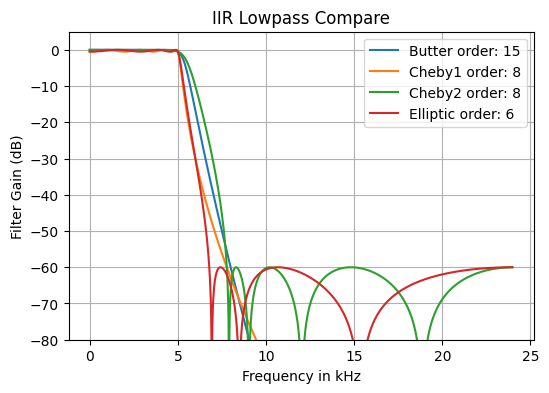

In [5]:
iir_d.freqz_resp_cas_list([sos_but,sos_cheb1,sos_cheb2,sos_elli],'dB',fs=48)
ylim([-80,5])
title(r'IIR Lowpass Compare')
ylabel(r'Filter Gain (dB)')
xlabel(r'Frequency in kHz')
legend((r'Butter order: %d' % (len(a_but)-1),
        r'Cheby1 order: %d' % (len(a_cheb1)-1),
        r'Cheby2 order: %d' % (len(a_cheb2)-1),
        r'Elliptic order: %d' % (len(a_elli)-1)),loc='best')
grid();

Code diatas menampilkan perbandingan respon frekuensi dari empat filter low-pass IIR yang didefinisikan pada code sebelumnya. Fungsi iir_d.freqz_resp_cas_list digunakan untuk menghitung dan menampilkan respons frekuensi dari masing-masing filter dalam dB, dengan parameter fs=48 untuk memperhitungkan frekuensi sampling sebesar 48 kHz. Batas y-axis ditetapkan dari -80 dB hingga 5 dB dengan ylim([-80,5]).

(15, 15)

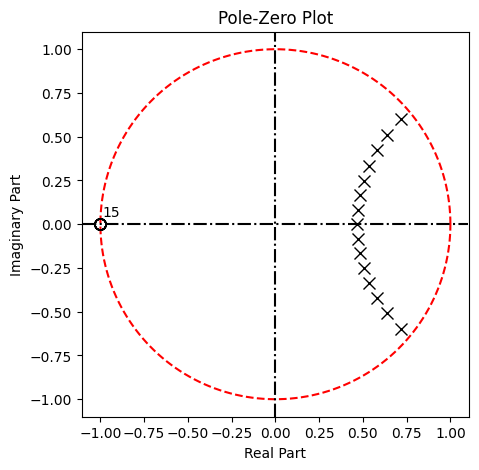

In [6]:
iir_d.sos_zplane(sos_but)

Pada code diatas, Fungsi iir_d.sos_zplane(sos_but) digunakan untuk menampilakan diagram pole-zero untuk filter IIR yang direpresentasikan dalam bentuk sekumpulan orde-kedua (second-order sections).

In [7]:
# Elliptic IIR Lowpass
b_lp,a_lp,sos_lp = iir_d.IIR_lpf(1950,2050,0.5,80,8000.,'ellip')
mr_lp = mrh.multirate_IIR(sos_lp)


Code diatas mendefinisikan sebuah filter low-pass IIR dengan menggunakan metode elliptic dengan parameter cut-off frequency 1950 Hz, stopband frequency 2050 Hz, toleransi noise 0.5 dB, orde 80, dan frekuensi sampling 8000 Hz.

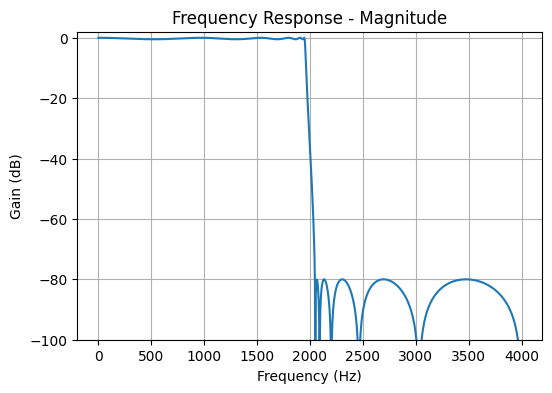

In [8]:
mr_lp.freq_resp('db',8000)

Menghitung dan menampilkan respons frekuensi dari filter IIR low-pass yang telah didefinisikan sebelumnya dalam skala desibel pada frekuensi sampel 8000 Hz.

(-130.0, -30.0)

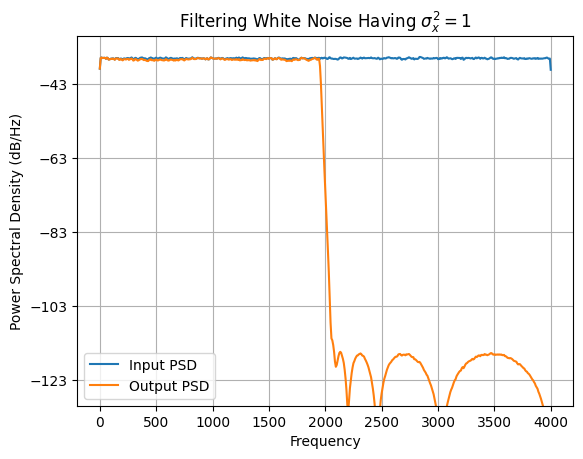

In [9]:
x = randn(1000000)
y = mr_lp.filter(x)
psd(x,2**10,8000);
psd(y,2**10,8000);
title(r'Filtering White Noise Having $\sigma_x^2 = 1$')
legend(('Input PSD','Output PSD'),loc='best')
ylim([-130,-30])

Code diatas melakukan filtering dari sinyal white noise x menggunakan filter low-pass IIR yang telah dirancang sebelumnya (mr_lp). Kemudian, spektrum daya (PSD) dari sinyal input dan output ditampilkan menggunakan fungsi psd, dengan jendela Welch dengan panjang 2^10 dan frekuensi sampling 8000 Hz.

In [10]:
fs = 8000
print('Expected PSD of %2.3f dB/Hz' % (0-10*log10(fs),))

Expected PSD of -39.031 dB/Hz


Menghitung dan mencetak nilai spektral daya yang diharapkan dari sinyal putih (white noise) pada frekuensi sampling 8000 Hz, diukur dalam dB/Hz.

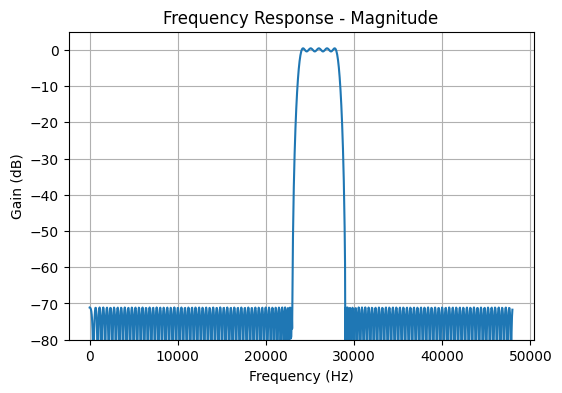

In [11]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='dB',fs=96000)
ylim([-80, 5])
grid();

code diatas mendefinisikan sebuah filter band-pass FIR menggunakan metode Remez dengan parameter batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple 0.5, orde 70, dan frekuensi sampling 96000 Hz. Plot respons frekuensi filter yang dihasilkan kemudian ditampilkan dalam skala dB menggunakan fir_d.freqz_resp_list, dengan batas y-axis dari -80 dB hingga 5 dB dan grid diaktifkan untuk memudahkan analisis.



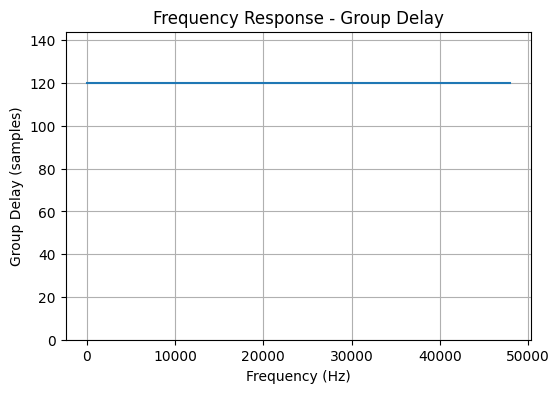

In [12]:
b_rec_bpf1 = fir_d.fir_remez_bpf(23000,24000,28000,29000,0.5,70,96000,8)
fir_d.freqz_resp_list([b_rec_bpf1],[1],mode='groupdelay_s',fs=96000)
grid();

Menampilkan plot respons waktu delay grup dari filter FIR band-pass yang telah didefinisikan sebelumnya dengan menggunakan metode Remez.

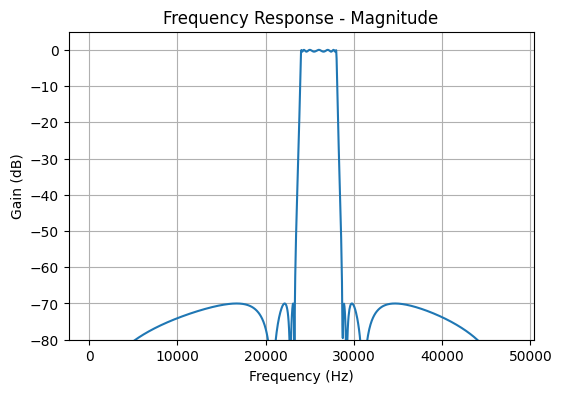

In [13]:
b_rec_bpf2,a_rec_bpf2,sos_rec_bpf2 = iir_d.IIR_bpf(23000,24000,28000,29000,
                                                   0.5,70,96000,'ellip')
with np.errstate(divide='ignore'):
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='dB',fs=96000)
ylim([-80, 5])
grid();

code diatas mendefinisikan dan memplot filter band-pass IIR dengan menggunakan metode elliptic, dengan parameter batas frekuensi bawah 23000 Hz, batas frekuensi atas 24000 Hz, batas frekuensi transisi bawah 28000 Hz, batas frekuensi transisi atas 29000 Hz, toleransi ripple 0.5 dB, orde 70, dan frekuensi sampling 96000 Hz.

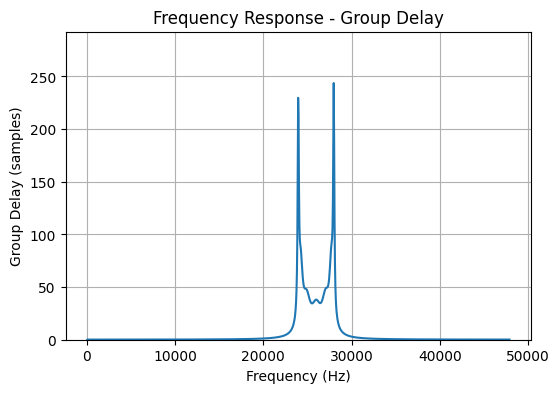

In [14]:
with np.errstate(divide='ignore', invalid='ignore'): #manage singularity warnings
    iir_d.freqz_resp_cas_list([sos_rec_bpf2],mode='groupdelay_s',fs=96000)
#ylim([-80, 5])
grid();

Code diatas menampilkan plot respons waktu delay grup dari filter band-pass II menggunakan metode elliptic yang sudah didefinisikan pada code sebelumnnya